## A combinação NumPy, Pandas e Scikit-Learn é muito poderosa

Embora O Scikit-Learn seja responsável por facilitar grande parte do pipeline de Machine Learning, dois componentes são essenciais para ler arquivos e manipular as informações: NumPy e Pandas. O NumPy auxilia a manipulação matricial dos dados, que é fundamental para aprendizado de máquina; enquanto o Pandas atua como um facilitador para a manipulação de dados de forma menos estruturada.

*Esse conteúdo é baseado no capítulo 'Machine Learning' de Numerical Python, segunda edição, de Robert Johannson.*

A seguir é utilizado o comando read_csv do Pandas para ter acesso aos dados do arquivo 'energy_data.csv', e o comando *describe* gera um sumário dos dados quando possível. A nomenclatura df para a variável vem de DataFrame do Pandas, mas poderia ser o nome que o programador quisesse dar.

In [4]:
import pandas as pd

df = pd.read_csv('energy_data.csv')
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Esse conjunto de dados está disponível em https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction# e um Github do artigo que originou essa contribuição está disponível em https://github.com/LuisM78/Appliances-energy-prediction-data.

O objetivo é utilizar as informações de clima fora e dentro de uma casa para estimar o consumo de energia elétrico que aquela casa, naquelas condições meteorológicas, demandaria. Portanto, serão considerados atributos todas as colunas exceto Appliace, e essa coluna será utilizada como *target*.

In [2]:
X = df.drop(['Appliances','date'],axis=1)
y = df.Appliances


In [3]:
X

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
print(X.shape)
print(y.shape)

(19735, 27)
(19735,)


São 27 atributos que farão a composição de X, e o total de amostras são 19735. Por se tratar de um problema de regressão, serão importados os módulos do Scikit-Learn para a separação dos dados e a geração dos regressores (modelos de regressão). Em seguida, os dados são separados com o comando *train_test_split* e um modelo de Regressão Linear é treinado com a função *fit*.

**Vamos supor um cenário com 20 amostras do conjunto inicial para propósitos didáticos:**

In [4]:
from sklearn import model_selection
from sklearn import linear_model

X_train, X_test, y_train, y_test = model_selection.train_test_split(X[:20], y[:20], test_size=0.5, random_state=42)
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Em seguida, é importante calcular o resíduo entre o que o modelo diz e o que de fato é. Esse resíduo também pode ser acumulado como erro utilizando alguma função. Vamos verificar então qual é o erro para o próprio conjunto de treino utilizando o erro quadrático médio, e depois o erro no teste.

In [5]:
from sklearn import metrics

erro_treino = metrics.mean_squared_error(y_train,model.predict(X_train))
print('RMSE no treino:', erro_treino)

erro_teste = metrics.mean_squared_error(y_test,model.predict(X_test))
print('RMSE no teste:', erro_teste)

RMSE no treino: 4.632211430296955e-24
RMSE no teste: 10834.649340707405


É possível perceber que o erro no treino é muito baixo, praticamente zero, enquanto que o erro no teste é bastante alto (> 10k). Isso se deve a um fenômeno chamado **overfitting**. É muito comum que, quando o número de atributos seja maior que o número de amostras, a regressão fique sobreajustada (overfit) para os dados de treino, e não generaliza suficiente para o conjunto de teste.

Outra forma de analisar o resultado de uma regressão é calculando o **r²-score** pela função score do modelo de regressão:

In [6]:
r2 = model.score(X_train, y_train)
print('r² no treino:', r2)

r2 = model.score(X_test, y_test)
print('r² no teste:', r2)

r² no treino: 1.0
r² no teste: 0.543996239869217


Os resultados novamente indicam sobreajustamento, dado que o r² no treino é 1.0 (máximo) e o r² no teste é baixo (metade).

Por último, também é possível visualizar essa diferença de forma gráfica. Compara-se o resíduo por amostra tanto no treino quanto no teste, e observa-se os coeficientes encontrados:

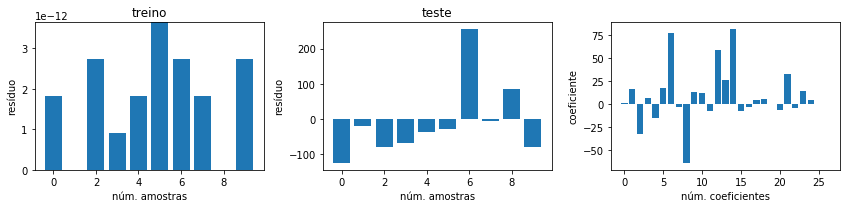

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("núm. amostras")
    axes[0].set_ylabel("resíduo")
    axes[0].set_title("treino")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("núm. amostras")
    axes[1].set_ylabel("resíduo")
    axes[1].set_title("teste")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("núm. coeficientes")
    axes[2].set_ylabel("coeficiente")
    fig.tight_layout()
    return fig, axes

residuo_treino = y_train - model.predict(X_train)
residuo_teste  = y_test - model.predict(X_test)

fig, ax = plot_residuals_and_coeff(residuo_treino, residuo_teste, model.coef_)

É possível perceber nas escalas dos resíduos que os erros são muito maiores no conjunto de teste do que no conjunto de treino. *Uma das formas de corrigir esse problema é aplicando regularização*, forçando os coeficientes a residirem num espaço próximo. As duas normais mais comuns de regularização são L1 e L2, respectivamente LASSO e Ridge. Enquanto que L2 favorece com coeficientes menores, L1 favorece modelos que têm poucos coeficientes próximos de zero.


**Quando usar L1 ou L2?**

* L1: Deseja-se eliminar o maior número de atributos que não contribuem com o problema;
* L2: Limitar a magnitude dos coeficientes do modelo.

**Utilizando Ridge — L2**

In [20]:
model = linear_model.Ridge()
model.fit(X_train, y_train)

erro_treino = metrics.mean_squared_error(y_train,model.predict(X_train))
print('RMSE no treino:', erro_treino)

erro_teste = metrics.mean_squared_error(y_test,model.predict(X_test))
print('RMSE no teste:', erro_teste)

RMSE no treino: 276.56920786683196
RMSE no teste: 9370.11655460307


O erro no treino não é mais próximo a zero, mas é possível perceber que *o erro no teste diminuiu*. Vale lembrar que os dados do teste são mais parecidos com os dados do mundo real, ou seja, são informações que o modelo não teve acesso, portanto mais difíceis de serem previstas corretamente.

Graficamente, é possível perceber uma mudança nos pesos também:

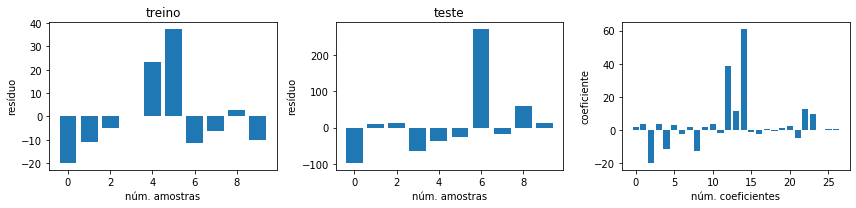

In [9]:
residuo_treino = y_train - model.predict(X_train)
residuo_teste  = y_test - model.predict(X_test)

fig, ax = plot_residuals_and_coeff(residuo_treino, residuo_teste, model.coef_)

**Utilizando LASSO — L1**

In [29]:
model = linear_model.Lasso(alpha=2.5)
model.fit(X_train, y_train)

erro_treino = metrics.mean_squared_error(y_train,model.predict(X_train))
print('MSE no treino:', erro_treino)

erro_teste = metrics.mean_squared_error(y_test,model.predict(X_test))
print('MSE no teste:', erro_teste)

erro_treino = np.sqrt(metrics.mean_squared_error(y_train,model.predict(X_train)))
print('RMSE no treino:', erro_treino)

erro_teste = np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test)))
print('RMSE no teste:', erro_teste)

MSE no treino: 247.00446501054935
MSE no teste: 6215.444871282493
RMSE no treino: 15.716375695768708
RMSE no teste: 78.83809276791577


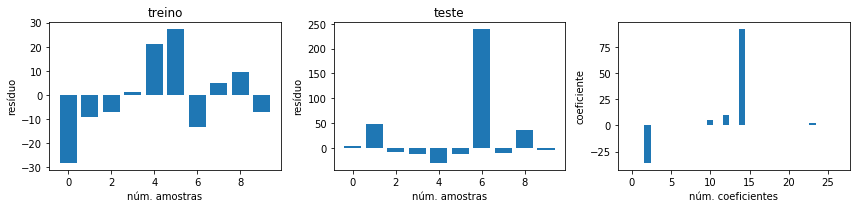

In [11]:
residuo_treino = y_train - model.predict(X_train)
residuo_teste  = y_test - model.predict(X_test)

fig, ax = plot_residuals_and_coeff(residuo_treino, residuo_teste, model.coef_)

Os resultados de erro no treino são mais baixos que do Ridge, porém mais altos que a regressão linear sem regularização, porém o erro no teste caiu aproximadamente para a metade. Também é possível perceber que L1 reduziu significativamente o número de atributos que, de fato, contribuem para a solução do problema.

Também é possível perceber que o **parâmetro alpha é configurável**, portanto é importante fazer uma varredura para identificar qual seria o melhor valor.

## Exercícios

1. **Faça a busca de melhor parâmetro de alpha para reduzir o erro quadrático médio nessa base de apenas 20 amostras, considerando L1 e L2. Considere utilizar as funções LassoCV e RidgeCV, e busque informações sobre elas na documentação do Scikit-Learn.**


2. **Recarregue a base e não filtre apenas 20 amostras e aplique os modelos de regressão vistos. Tenha um olhar crítico para os seguintes questionamentos após codificar e ver os resultados:**
    * Qual regressão teve o melhor resultado?
    * Há algum sinal de overfitting?
    * Todos atributos são relevantes para o problema?
    * Todos coeficientes estão em uma mesma magnitude?

In [43]:
#1 --

for i in range(-4,8):
    model = linear_model.Lasso(alpha=10** i)
    model.fit(X_train, y_train)
    
    print ('i -->', i)
    # erro_treino = metrics.mean_squared_error(y_train,model.predict(X_train))
    # print('MSE no treino:', erro_treino)

    # erro_teste = metrics.mean_squared_error(y_test,model.predict(X_test))
    # print('MSE no teste:', erro_teste)

    erro_treino = np.sqrt(metrics.mean_squared_error(y_train,model.predict(X_train)))
    print('RMSE no treino:', erro_treino)

    erro_teste = np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test)))
    print('RMSE no teste:', erro_teste)

i --> -4
RMSE no treino: 0.13362419356993144
RMSE no teste: 120.48402552294904
i --> -3
RMSE no treino: 0.09162480905856364
RMSE no teste: 114.56436896005395
i --> -2
RMSE no treino: 0.4701486100818795
RMSE no teste: 99.34073741926926
i --> -1
RMSE no treino: 1.5236333896888148
RMSE no teste: 129.86308121782648
i --> 0
RMSE no treino: 11.513359039361902
RMSE no teste: 75.44642078021339
i --> 1
RMSE no treino: 27.4872329142035
RMSE no teste: 82.97992625618929
i --> 2
RMSE no treino: 73.46311424622132
RMSE no teste: 114.8089768603647
i --> 3
RMSE no treino: 117.40953964648699
RMSE no teste: 156.1569723067145
i --> 4
RMSE no treino:117.40953964648699
RMSE no teste: 156.1569723067145
i --> 5
RMSE no treino: 117.40953964648699
RMSE no teste: 156.1569723067145
i --> 6
RMSE no treino: 117.40953964648699
RMSE no teste: 156.1569723067145
i --> 7
RMSE no treino: 117.40953964648699
RMSE no teste: 156.1569723067145


In [42]:
#1 --

for i in range(-4,8):
    model = linear_model.Ridge(alpha=10** -i)
    model.fit(X_train, y_train)
    
    print ('i -->', i)
    # erro_treino = metrics.mean_squared_error(y_train,model.predict(X_train))
    # print('MSE no treino:', erro_treino)

    # erro_teste = metrics.mean_squared_error(y_test,model.predict(X_test))
    # print('MSE no teste:', erro_teste)

    erro_treino = np.sqrt(metrics.mean_squared_error(y_train,model.predict(X_train)))
    print('RMSE no treino:', erro_treino)

    erro_teste = np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test)))
    print('RMSE no teste:', erro_teste)

i --> -4
RMSE no treino: 114.26537792466806
RMSE no teste: 151.1375005267468
i --> -3
RMSE no treino: 103.60239733924992
RMSE no teste: 137.5438536421229
i --> -2
RMSE no treino: 79.5598153051633
RMSE no teste: 121.67572541005156
i --> -1
RMSE no treino: 44.5360617697841
RMSE no teste: 103.69726099065697
i --> 0
RMSE no treino: 16.630370045998134
RMSE no teste: 96.79936236671743
i --> 1
RMSE no treino: 6.320824237889275
RMSE no teste: 95.41910329028201
i --> 2
RMSE no treino: 0.9905077289632975
RMSE no teste: 99.60412727895029
i --> 3
RMSE no treino: 0.10660762640428453
RMSE no teste: 101.3767657500171
i --> 4
RMSE no treino: 0.010756346792874101
RMSE no teste: 101.63130036867754
i --> 5
RMSE no treino: 0.001076623016135588
RMSE no teste: 101.657995334026
i --> 6
RMSE no treino: 0.00010767221635828858
RMSE no teste: 101.66067802094693
i --> 7
RMSE no treino: 1.0767319354138275e-05
RMSE no teste: 101.66094642237096
